### Clasificación de empresas fraudulentas: un estudio de caso de un Auditoría

Este documento es un estudio de caso de una visita a una empresa de auditoría externa. Se recogieron 777 datos anuales de 46 ciudades diferentes y en empresas de 14 sectores: Agricultura (200), Riego (114), Ganadería (95), Edificios y vias (82), Salud pública (77), Forestal (70), Corporativo (47), Pesca (41), Industrias (37), Tierra (5), Eléctrica (4), Ciencia y Tecnología (3), Comunicación (1) y Turismo (1).

La auditoría se define como el proceso de examinar los registros de cualquier negocio para corroborar que sus estados financieros están en cumplimiento de las leyes y principios contables, o por el contrario para detectar fraudes y revelar a las empresas culpables de instigar transacciones ilegales. 

El objetivo de esta investigación consiste en construir un  modelo de clasificación que pueda predecir si una empresa es fraudulenta sobre la base del riesgo actual e histórico de factores. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
from google.colab import files 
uploaded=files.upload()

Saving audit_risk2.csv to audit_risk2.csv


In [32]:
data=pd.read_csv("audit_risk2.csv", delimiter=";")

In [33]:
data

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,17148.0000,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3506.0000,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


Se encontraron dos filas con registros Nan por lo que esos registros no se tendran en cuenta en el estudio. 

In [117]:
data=data.dropna()

In [118]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

## Descipción de las variables

In [119]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sector_score,775.0,20.138877,24.301417,1.85,2.3700,3.890,55.570,59.850
LOCATION_ID,775.0,14.860645,9.878130,1.00,8.0000,13.000,19.000,44.000
PARA_A,775.0,2.453059,5.681977,0.00,0.2100,0.880,2.480,85.000
Score_A,775.0,0.351484,0.174082,0.20,0.2000,0.200,0.600,0.600
Risk_A,775.0,1.352712,3.442348,0.00,0.0420,0.176,1.488,51.000
PARA_B,775.0,10.813924,50.114461,0.00,0.0000,0.410,4.160,1264.630
Score_B,775.0,0.313290,0.169865,0.20,0.2000,0.200,0.400,0.600
Risk_B,775.0,6.342181,30.091403,0.00,0.0000,0.082,1.887,758.778
TOTAL,775.0,13.248138,51.342047,0.00,0.5400,1.390,7.775,1268.910
numbers,775.0,5.067742,0.264608,5.00,5.0000,5.000,5.000,9.000


In [120]:
data0=data.drop(columns="Risk")

In [121]:
data0.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,17148.0000
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3506.0000
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832


In [122]:
data0.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk'],
      dtype='object')

In [123]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [124]:
data["Risk"].value_counts()

0    470
1    305
Name: Risk, dtype: int64

Conforme a la información del autor, se identificaron 305 empresas en riesgo de ser fraudulentas y 470 empresas sin este riesgo.

### Normalización del conjunto de datos

Con el fin de tener una misma medida de los datos, se procedió a realizar la normalización de los datos.

In [125]:
df_st =  StandardScaler().fit_transform(data0)  
pd.DataFrame(df_st, columns=data0.columns).head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,-0.669071,0.824509,0.304129,1.428500,0.335827,-0.166006,-0.667374,-0.194273,-0.128012,-0.256174,...,-0.165129,-0.410727,-0.196822,-0.246737,-0.175514,-0.353484,-0.188763,-0.38895,0.0,-0.120611
1,-0.669071,-0.897575,-0.432005,-0.870747,-0.393216,-0.119482,-0.667374,-0.178777,-0.164068,-0.256174,...,-0.165129,-0.410727,-0.196822,-0.246737,-0.175514,-0.819385,-0.295260,-0.38895,0.0,-0.164664
2,-0.669071,-0.897575,-0.342190,-0.870747,-0.363566,-0.211331,-0.667374,-0.209370,-0.243781,-0.256174,...,-0.165129,-0.410727,-0.196822,-0.246737,-0.175514,-0.819385,-0.313056,-0.38895,0.0,-0.164664
3,-0.669071,-0.897575,-0.432005,-0.870747,-0.393216,-0.000278,1.688957,0.004583,-0.047714,3.525439,...,-0.165129,-0.410727,-0.196822,-0.246737,-0.175514,1.976022,-0.030327,-0.38895,0.0,-0.155658
4,-0.669071,-0.897575,-0.432005,-0.870747,-0.393216,-0.214326,-0.667374,-0.210368,-0.256644,-0.256174,...,-0.165129,-0.410727,-0.196822,-0.246737,-0.175514,-0.819385,-0.315392,-0.38895,0.0,-0.164664


### Perform PCA using scikit-learn!

In [126]:
pca_out = PCA(n_components=6).fit(df_st)

pca_out.explained_variance_ratio_

array([0.31496442, 0.12694332, 0.11282909, 0.09391416, 0.0811372 ,
       0.07370042])

In [127]:
np.cumsum(pca_out.explained_variance_ratio_)

array([0.31496442, 0.44190774, 0.55473682, 0.64865098, 0.72978818,
       0.8034886 ])

In [129]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data0.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6
variable,,,,,,
Sector_score,-0.119191,0.009362,0.123421,-0.022243,-0.014246,0.251262
LOCATION_ID,-0.004140,-0.077038,-0.040214,-0.113676,0.082555,-0.222622
PARA_A,0.187463,-0.192591,-0.152266,0.315230,0.060233,-0.139007
Score_A,0.206270,-0.083651,-0.169747,0.029330,0.105895,-0.362659
Risk_A,0.189013,-0.192247,-0.152446,0.313379,0.062053,-0.142050
PARA_B,0.240451,-0.087182,0.392435,-0.147145,-0.079131,-0.081784
Score_B,0.219163,-0.092407,-0.118843,-0.094571,0.155442,-0.315652
Risk_B,0.240283,-0.087303,0.392700,-0.147008,-0.079591,-0.081450
TOTAL,0.254699,-0.106353,0.367227,-0.109306,-0.070196,-0.097162


## Correlation matrix plot

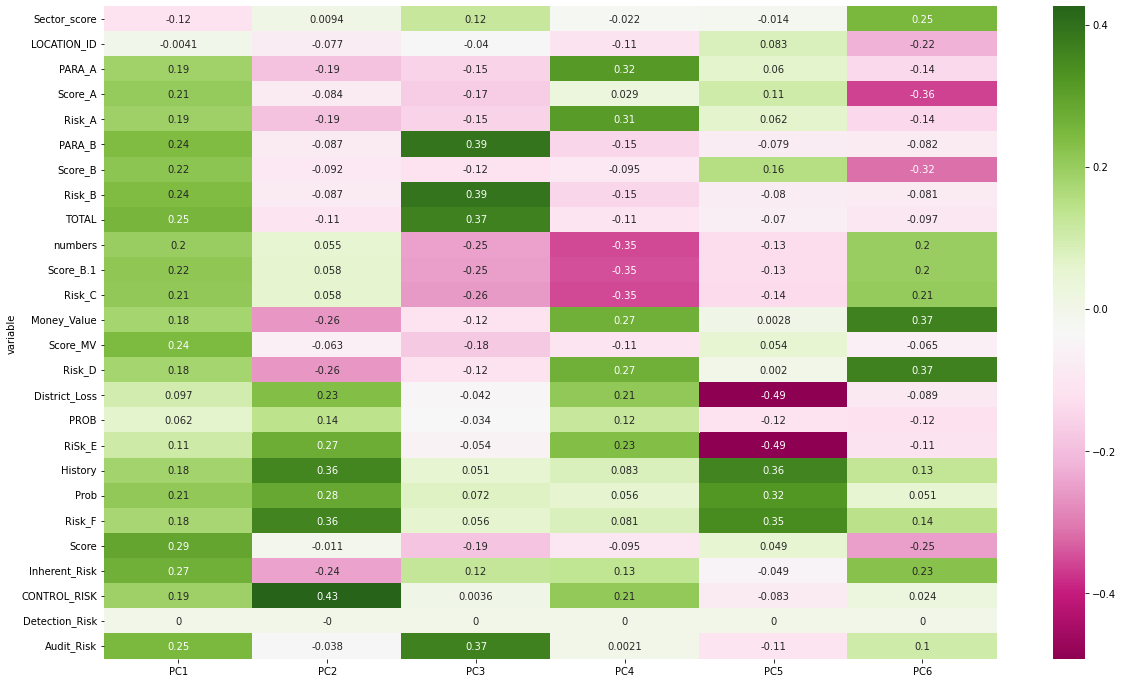

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
ax = sns.heatmap(loadings_df, annot=True, cmap='PiYG')
plt.show()

In [233]:
loadings_df[(loadings_df["PC1"]>0.25)|(loadings_df["PC1"]<-0.25)]["PC1"]

variable
TOTAL            0.254699
Score            0.290865
Inherent_Risk    0.267209
Name: PC1, dtype: float64

In [234]:
loadings_df[(loadings_df["PC2"]>0.3)|(loadings_df["PC2"]<-0.3)]["PC2"]

variable
History         0.355749
Risk_F          0.360233
CONTROL_RISK    0.425589
Name: PC2, dtype: float64

In [229]:
loadings_df[(loadings_df["PC3"]>0.3)|(loadings_df["PC3"]<-0.3)]["PC3"]

variable
PARA_B        0.392435
Risk_B        0.392700
TOTAL         0.367227
Audit_Risk    0.366455
Name: PC3, dtype: float64

La matriz de correlación muestra, las correlaciones postivas o negativas entre cada una las variables con las componetes principales. Según el gráfico, las variables con tonalidades verde oscuro, tienen gran correlación positiva con la componente, mientras las variables que toman tonalidades moradas oscuras se correlacionan de forma negativa. Para el caso de la primera componente (PC1) que explica el 31.5% de la variación de los datos originales, las variables PARA_B, Risk_B, TOTAL, Score_MV, Score, Inherent_Risk y Audit_Risk tienen una gran correlación positiva con esta componente. 

En cuanto a la componente 2 PC2, la cual explica el 12.7% de la variación de los datos, las variables que mas correlación tienen son: Risk_E, History, Prob, Risk_F y CONTROL_RISK, las cuales tambien se correlacionan de forma positiva.

In [131]:
loadings_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], dtype='object')

In [132]:
abs(loadings_df["PC1"]).mean()

0.18175174116454593

### Gráfico Scree (prueba del codo)

In [133]:
pca_out.explained_variance_ratio_, pca_out.explained_variance_ratio_[:4].sum()

(array([0.31496442, 0.12694332, 0.11282909, 0.09391416, 0.0811372 ,
        0.07370042]), 0.6486509829301976)

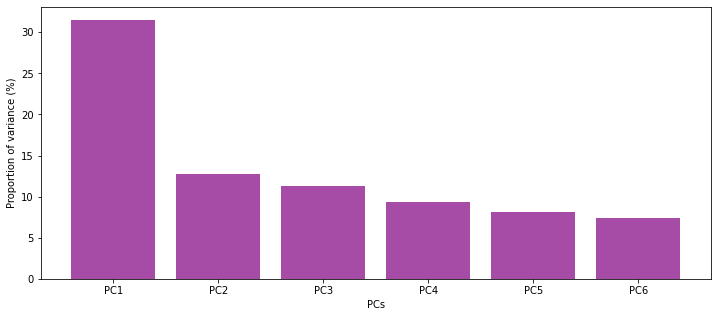

In [134]:
plt.figure(figsize=(12,5))
plt.bar(loadings_df.columns,pca_out.explained_variance_ratio_*100, color="purple", alpha=0.7)
plt.ylabel("Proportion of variance (%)")
plt.xlabel("PCs")
plt.show()

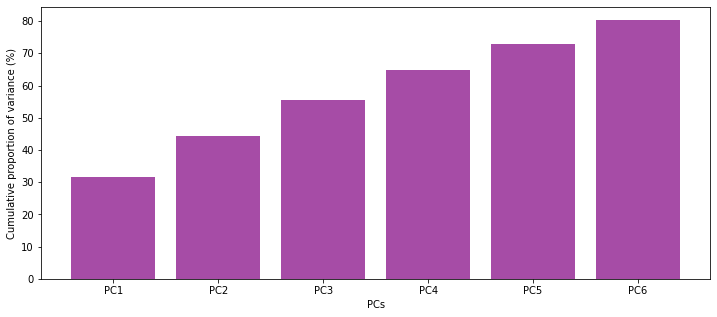

In [135]:
plt.figure(figsize=(12,5))
plt.bar(loadings_df.columns,np.cumsum(pca_out.explained_variance_ratio_*100), color="purple", alpha=0.7)
plt.ylabel("Cumulative proportion of variance (%)")
plt.xlabel("PCs")
plt.show()

Esta técnica gráfica es útil para retener las componentes principales, en este caso de aprecia que a partir de la segunda componente, los cambios en la pendiente se hacen mas evidentes, sin embargo al observar los cambios de forma acumulada vemos que a partir de la quinta componente se explica un poco mas del 70% de la variabilidad de datos. Y al agregar una compponente adicional, se explica el 80% de la variabilidad del conjunto original de datos. 

In [136]:
! pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


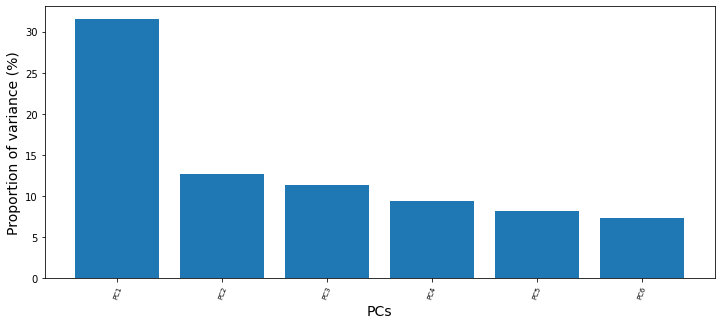

In [162]:
# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_

# get scree plot (for scree or elbow test)
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[loadings_df.columns,pca_out.explained_variance_ratio_], show=True,dim=(12,5),axlabelfontsize=14)
plt.show()
# Scree plot will be saved in the same directory with name screeplot.png

# Get PCA loadings plots

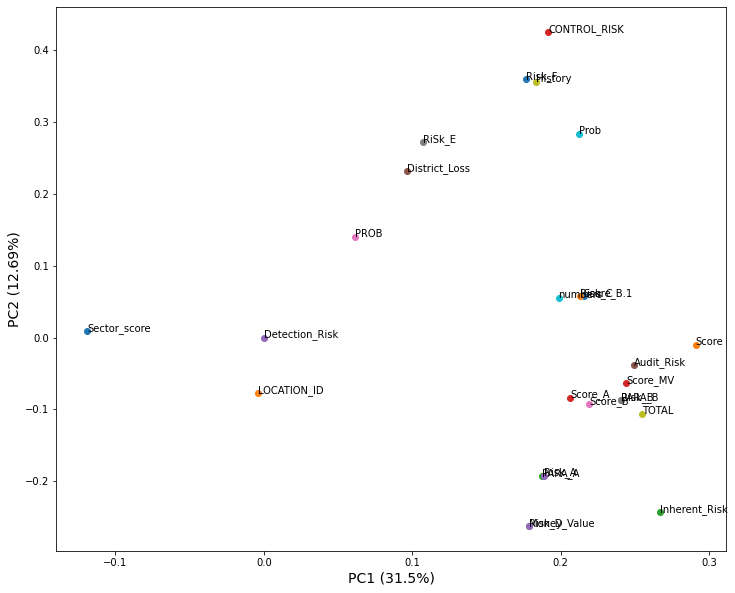

In [183]:
# 2D
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=data0.columns.values,
                show=True,dim=(12,10),axlabelfontsize=14,
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

El gráfico en 2D, muestra que las variables mas cercanas a las esquinas son las que tienen mayor correlacion entre las dos componentes principales, tal es el caso de Inherent_Risk, Money_Value,TOTAL y Score_MV.

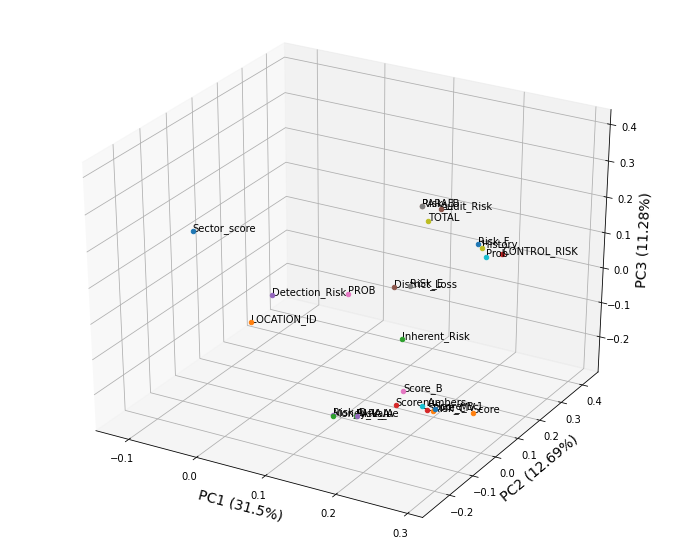

In [139]:
# 3D
cluster.pcaplot(x=loadings[0], y=loadings[1], z=loadings[2],  labels=data0.columns.values, 
                show=True,dim=(12,10),axlabelfontsize=14,
                var1=round(pca_out.explained_variance_ratio_[0]*100, 2), 
                var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
                var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

### Biplot del PCA

In [142]:
data["Risk"]=data["Risk"].replace(0, "g")
data["Risk"]=data["Risk"].replace(1, "r")

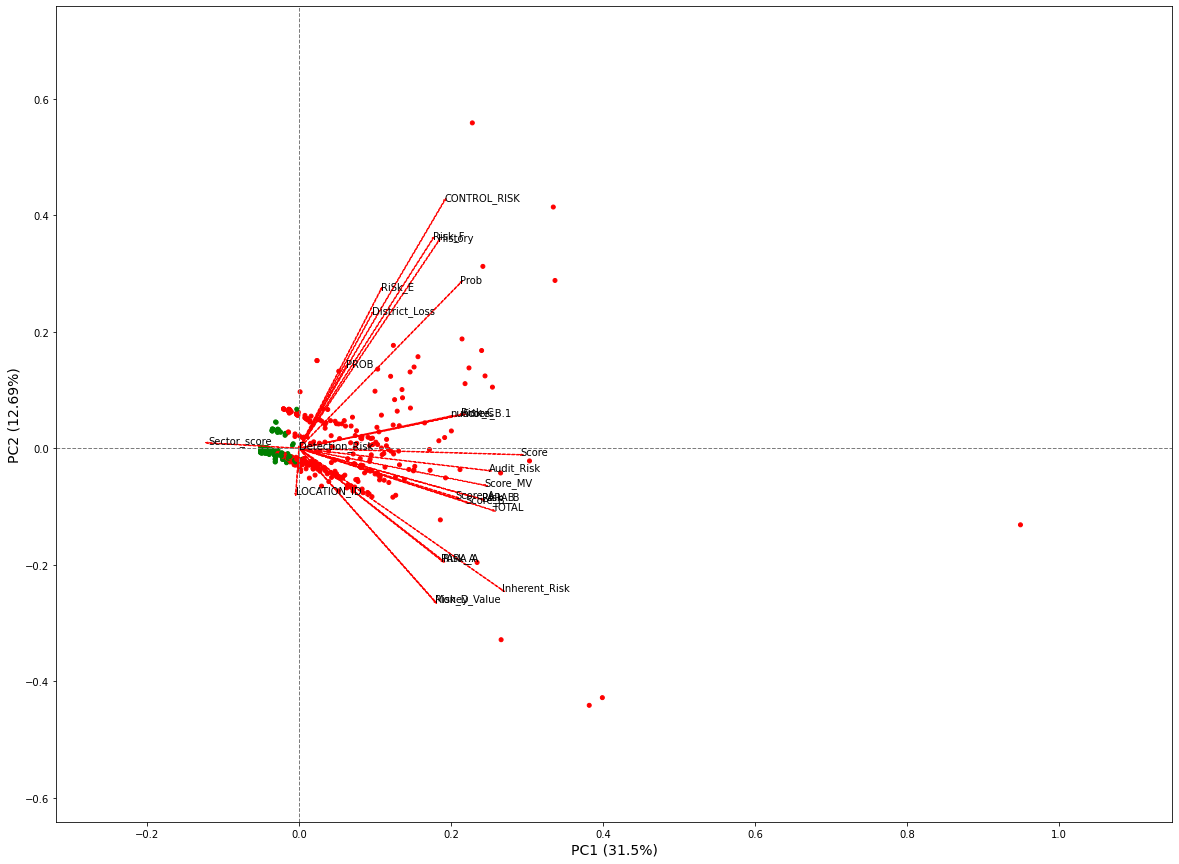

In [171]:
# get PC scores
pca_scores = PCA().fit_transform(df_st)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data0.columns.values,dotsize=16,
               colordot=data["Risk"],arrowcolor='r',arrowlinewidth=0.9,arrowlinestyle='--',show=True,dim=(20,15),axlabelfontsize=14,
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
               var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

El Biplot de las PCs muestra las relaciones entre las variables y las observaciones. En el grafico evidencian dos clusters, siendo los puntos rojos las empresas en riesgo de ser fraudulentas y las verdes las empresas que no estan en riesgo. Se observa que las variables Score, Audit Risk, y Score_MV son las más furtemente relacionadas con el riesgo de cometer fraude. Variables que se identificaron en la primera componente. Por su parte se las lineas más largas del grafico como Inherent_Risk (Componente 1) y CONTROL_RISK (Componente 2) y Money_Value (principalmente en la componente 6) tambien pueden ser buenas predictitoras del riesgo de fraude por parte de las empresas.

### Regresión

Conforme a los resultados obtenidos del análisis de componentes principales, de 26 variables, nos quedamos con 6 variables.

In [194]:
data["Risk0"]=data["Risk"].replace("g", 0)
data["Risk0"]=data["Risk0"].replace("r", 1)

In [184]:
import statsmodels.api as sm

In [237]:
X = data[["Risk_B", "TOTAL", "Score_MV", "Score", "District_Loss", "History"]]
Y = data["Risk0"]
X= sm.add_constant(X)
model = sm.OLS(Y,X).fit()
pred=round(model.predict(X))
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Risk0   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     322.3
Date:                Sat, 04 Jun 2022   Prob (F-statistic):          6.44e-206
Time:                        20:14:44   Log-Likelihood:                -57.091
No. Observations:                 775   AIC:                             128.2
Df Residuals:                     768   BIC:                             160.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9308      0.038    -24.498      0.000      -1.005      -0.856
Risk_B           -0.0116      0.003     -3.800      0.000      -0.018      -0.006
TOTAL             0.0063      0.002      3.451      0.001       0.003       0.010
Score_MV          0.8401      0.091      9.223      0.000       0.661       1.019
Score             0.2968      0.019     15.591      0.000       0.259       0.334
District_Loss     0.1073      0.008     13.602      0.000       0.092       0.123
History          -0.0106      0.019     -0.562      0.575      -0.047       0.026
==============================================================================
Omnibus:                       81.497   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.169
Skew:                           0.766   Prob(JB):                     3.61e-26
Kurtosis:                       4.131   Cond. No.                         602.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Al correr el modelo, se encontró un R ajustado de 0.716, lo cual indica una buena medida de ajuste. Por su parte, la variable Risk_B tiene una relacion inversa con el riesgo y las variables TOTAL, Score_MV, Score y District_Loss tienen una relación directa con el riesgo. 

Se probó el modelo con las varibles Inherent_Risk y Audit_Risk, sin embargo resultaron tener coeficientes muy cercanos al cero y que conforme al valor que puede tomar la variable no aportan tanto peso al modelo, por lo que fueron reemplazadas por la variable District_Loss, la cual tiene una gran correlación en la componente 5. 




Text(0.5, 0, 'original')

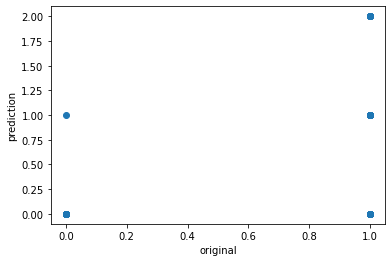

In [215]:
plt.scatter(Y,pred)
plt.ylabel("prediction")
plt.xlabel("original")

In [201]:
from sklearn.metrics import confusion_matrix

In [224]:
confusion_matrix(Y,pred)/775*100

array([[60.51612903,  0.12903226,  0.        ],
       [ 5.16129032, 32.51612903,  1.67741935],
       [ 0.        ,  0.        ,  0.        ]])

Finalmente, tenemos que la regresión explica el 93% de las veces el comportamiento de las datos originales, el 60.5% de las veces que el riesgo fue 1, la regresión le dio el valor de 1, y el 32.5% de las veces que el riesgo fue 0, la regresion le dio el valor de 0. frente al 7% que erró en el resultado y asignó un valor distinto al de la data original.